In [1]:
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname((os.path.abspath(""))))

In [2]:
from src.pipeline import Pipeline

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
pipeline = Pipeline()

In [4]:
pipeline.setup()

In [5]:
pipeline.preprocess()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 456.62it/s]


In [6]:
pipeline.create_all_features()

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:00<00:00, 960.55it/s]


In [7]:
pipeline.features

,qID,pID,y,w2v_cosine,w2v_euclidean,w2v_manhattan,tfidf_cosine,tfidf_euclidean,tfidf_manhattan,glove_cosine,...,polarity_doc,subjectivity_query,polarity_query,bm25,doc_nouns,doc_adjectives,doc_verbs,query_nouns,query_adjectives,query_verbs
0,488467,6256112,1,0.999949,77.764275,639.608403,0.466888,1.032581,3.373521,0.642888,...,0.020000,1.0,0.0,-20.174456,14,7,7,2,1,1
1,124599,4924774,1,0.999593,51.144382,420.368907,0.543206,0.955818,3.091751,-0.294182,...,0.000000,0.0,0.0,-12.668757,7,1,2,2,0,0
2,560377,893530,1,0.999900,46.374523,381.290391,0.257147,1.218895,5.017585,0.576715,...,-0.125000,0.0,0.0,-17.635882,13,2,8,0,2,2
3,1015340,3687433,1,0.999945,25.751593,211.635036,0.341013,1.148030,4.683098,0.560266,...,-0.077778,0.3,0.2,-16.037243,14,4,4,4,1,1
5,932835,3292443,1,0.999741,74.064491,608.660769,0.780465,0.662623,3.123014,0.421301,...,0.116667,0.0,0.0,-29.214098,17,3,9,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,427506,5085340,0,0.999313,69.391655,570.560168,0.373732,1.119168,5.287708,0.479431,...,0.370000,0.0,0.0,-19.536848,19,5,5,3,1,1
134,588340,4322103,0,0.999720,105.998856,871.544458,0.100769,1.341068,6.843310,-0.086400,...,-0.044444,0.0,0.0,-8.574309,26,11,5,1,1,2
135,64644,4141830,0,0.999812,72.696922,597.741511,0.369009,1.123380,4.775432,0.499721,...,0.055556,0.0,0.0,-11.243691,10,3,18,1,0,3
136,55778,1342093,0,0.999706,101.946732,838.093354,0.457584,1.041553,4.544277,0.875458,...,0.200000,0.0,0.0,-9.030987,19,3,8,2,1,0


### Correlation Matrix

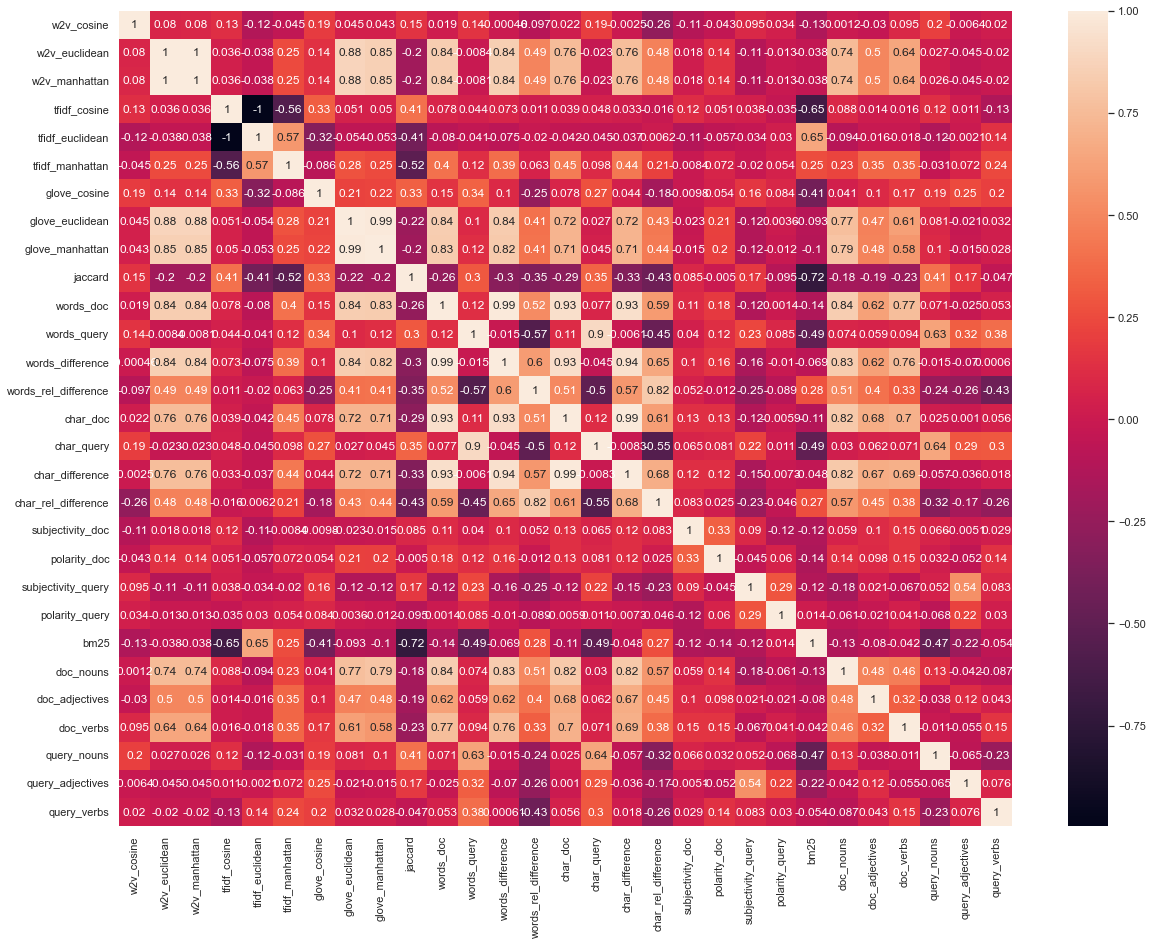

In [9]:
corr = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr()
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr, annot=True)
plt.show()

### Forward Selection

In [ ]:
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical

logistic_regression_search_space: list = []
logistic_regression_search_space.append(Categorical(['l2', 'none'], name='penalty'))
logistic_regression_search_space.append(Real(0.1, 100.0, name='C'))
logistic_regression_search_space.append(Real(1e-6, 0.1, name='tol'))